# Análisis exploratorio de incidencia delictiva en México

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Cargar los datos
# data_delitos       = pd.read_csv('data/delitos.csv')
data_datos_delitos = pd.read_csv('data/datos_delitos.csv', encoding = 'latin1')

In [3]:
delitos = pd.melt(data_datos_delitos, 
                  id_vars    = ['Año', 'Clave_Ent', 'Entidad', 'Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito', 'Modalidad'],
                  var_name   = 'mes', 
                  value_name = 'frecuencia')
numero_mes = {
    'Enero':      '01', 'Febrero':   '02', 
    'Marzo':      '03', 'Abril':     '04',   
    'Mayo':       '05', 'Junio':     '06',
    'Julio':      '07', 'Agosto':    '08',  
    'Septiembre': '09', 'Octubre':   '10', 
    'Noviembre':  '11', 'Diciembre': '12'
}
delitos['mes']   = delitos['mes'].map(numero_mes)
delitos['fecha'] = pd.to_datetime(delitos['Año'].astype(str) + '-' + delitos['mes'] + '-01')
delitos          = delitos.rename(columns = {
    'Año':                    'anio',
    'Clave_Ent':              'clave_ent',
    'Entidad':                'entidad',
    'Bien jurídico afectado': 'bien_juridico_afectado',
    'Tipo de delito':         'tipo_de_delito',
    'Subtipo de delito':      'subtipo_de_delito',
    'Modalidad':              'modalidad',
    'Mes':                    'nombre_mes'
})
mes_ingles_espanol = {
    'january':   'enero',      'february': 'febrero', 
    'march':     'marzo',      'april':    'abril', 
    'may':       'mayo',       'june':     'junio',
    'july':      'julio',      'august':   'agosto', 
    'september': 'septiembre', 'october':  'octubre', 
    'november':  'noviembre',  'december': 'diciembre'
}
delitos['nombre_mes'] = delitos['fecha'].dt.strftime('%B').str.lower()
delitos['nombre_mes'] = delitos['nombre_mes'].map(mes_ingles_espanol)
delitos = delitos[['anio', 'clave_ent', 
                   'entidad', 'bien_juridico_afectado', 
                   'tipo_de_delito', 'subtipo_de_delito', 
                   'nombre_mes', 'fecha', 'frecuencia']]

In [4]:
delitos.head()

,anio,clave_ent,entidad,bien_juridico_afectado,tipo_de_delito,subtipo_de_delito,nombre_mes,fecha,frecuencia
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,enero,2015-01-01,3.0
1,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,enero,2015-01-01,1.0
2,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,enero,2015-01-01,0.0
3,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,enero,2015-01-01,2.0
4,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,enero,2015-01-01,0.0


#### Ejercicio 1: Elige 3 estados de la república y grafica una serie de tiempo de la frecuencia abosluta de homicidios dolosos de enero 2015 a julio 2019 en estas tres entidades

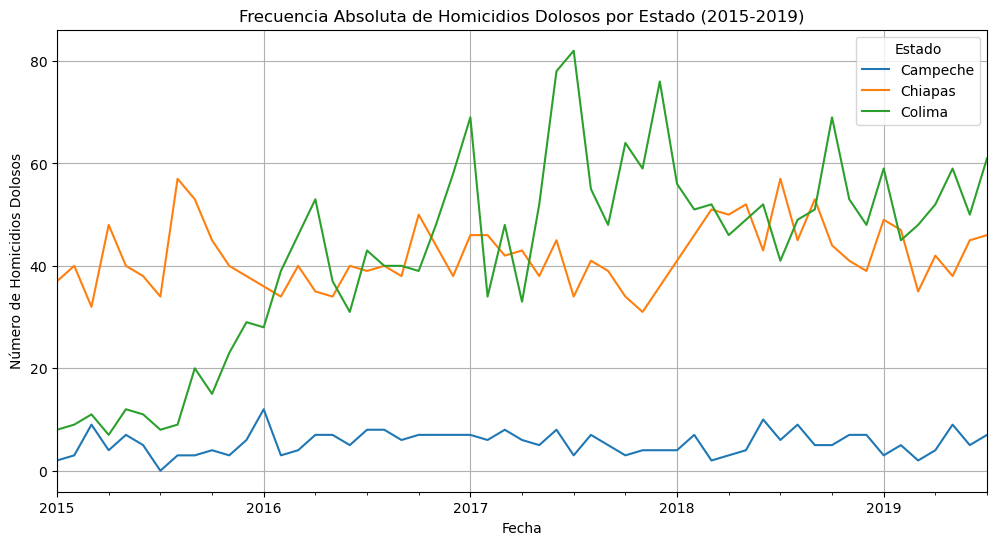

In [5]:
# Filtrar por Homicidios Dolosos y tres estados específicos
df_homicidios = delitos[(delitos['subtipo_de_delito'] == 'Homicidio doloso') &
                        (delitos['fecha'] >= '2015-01-01')                   & 
                        (delitos['fecha'] <= '2019-07-31')                   &
                        (delitos['entidad'].isin(['Campeche', 'Colima', 'Chiapas']))].copy()

# Usar .loc para evitar SettingWithCopyWarning al convertir la columna 'fecha'
df_homicidios.loc[:, 'fecha'] = pd.to_datetime(df_homicidios['fecha'])

# Hacer una tabla pivote
pivot_df = df_homicidios.pivot_table(values     = 'frecuencia', 
                                     index      = pd.Grouper(key = 'fecha', freq = 'M'), 
                                     columns    = 'entidad', 
                                     aggfunc    = 'sum', 
                                     fill_value = 0)

# Serie de tiempo
pivot_df.plot(figsize = (12, 6), title = 'Frecuencia Absoluta de Homicidios Dolosos por Estado (2015-2019)')
plt.xlabel('Fecha')
plt.ylabel('Número de Homicidios Dolosos')
plt.legend(title = 'Estado')
plt.grid(True)
plt.show()

#### Ejercicio 2: Contetas las siguientes  preguntas:
1. ¿Cuántos homicidios dolosos hubo en Colima en el 2018?
2. ¿Cuantos robos de vehículo automotor ha habido en el 2019?
3. Obten la suma de homicidos dolosos y feminidios en toda la República Mexicana en cada año.
4. ¿En qué mes y en qué entidad ha ocurrido el mayor número de feminicidios?
5. ¿En qué año y en qué entidad ha ocurrido el mayor número de feminicidios?

In [6]:
# Homicidios Dolosos en Colima en 2018:
homicidios_colima_2018 = delitos[(delitos['subtipo_de_delito'] == 'Homicidio doloso') &
                                 (delitos['entidad'] == 'Colima')                     &
                                 (delitos['anio'] == 2018)]['frecuencia'].sum()
print(homicidios_colima_2018)
homicidios_colima_2018 = delitos[(delitos['subtipo_de_delito'] == 'Homicidio doloso') &
                                 (delitos['entidad'] == 'Colima')                     &
                                 (pd.to_datetime(delitos['fecha']).dt.year == 2018)]['frecuencia'].sum()
print(homicidios_colima_2018)

617.0
617.0


In [7]:
# Robos de Vehículo Automotor en 2019:
robos_vehiculos_2019 = delitos[(delitos['subtipo_de_delito'] == 'Robo de vehículo automotor') & 
                               (delitos['anio'] == 2019)]['frecuencia'].sum()
print(robos_vehiculos_2019)
robos_vehiculos_2019 = delitos[(delitos['subtipo_de_delito'] == 'Robo de vehículo automotor') & 
                               (pd.to_datetime(delitos['fecha']).dt.year == 2019)]['frecuencia'].sum()
print(robos_vehiculos_2019)

187661.0
187661.0


In [8]:
# Suma de Homicidios Dolosos y Feminicidios por Año:
homicidio_feminicidio = delitos[(delitos['subtipo_de_delito'].isin(['Homicidio doloso', 'Feminicidio']))].pivot_table(
    values     = 'frecuencia',
    index      = 'anio',
    aggfunc    = 'sum',
    fill_value = 0
)
print(homicidio_feminicidio)
homicidio_feminicidio = delitos[(delitos['subtipo_de_delito'].isin(['Homicidio doloso', 'Feminicidio']))].pivot_table(
    values     = 'frecuencia',
    index      = pd.to_datetime(delitos['fecha']).dt.year,
    aggfunc    = 'sum',
    fill_value = 0
)
print(homicidio_feminicidio)

      frecuencia
anio            
2015       16532
2016       20756
2017       25777
2018       29995
2019       30445
2020       29786
2021       29263
2022       27240
2023       26119
2024       13255
       frecuencia
fecha            
2015        16532
2016        20756
2017        25777
2018        29995
2019        30445
2020        29786
2021        29263
2022        27240
2023        26119
2024        13255


In [9]:
# Fecha con Mayor Número de Feminicidios:
fecha_feminicidios = delitos[delitos['subtipo_de_delito'] == 'Feminicidio'].pivot_table(
    values     = 'frecuencia',
    index      = 'fecha', 
    aggfunc    = 'sum', 
    fill_value = 0
).sort_values('frecuencia', ascending = False)
print(fecha_feminicidios)
# Año con Mayor Número de Feminicidios:
anio_feminicidios = delitos[delitos['subtipo_de_delito'] == 'Feminicidio'].pivot_table(
    values     = 'frecuencia',
    index      = 'anio', 
    aggfunc    = 'sum', 
    fill_value = 0
).sort_values('frecuencia', ascending = False)
print(anio_feminicidios)
# Mes con Mayor Número de Feminicidios:
mes_feminicidios = delitos[delitos['subtipo_de_delito'] == 'Feminicidio'].pivot_table(
    values     = 'frecuencia',
    index      = 'nombre_mes', 
    aggfunc    = 'sum', 
    fill_value = 0
).sort_values('frecuencia', ascending = False)
print(mes_feminicidios)
# Entidad con Mayor Número de Feminicidios:
entidad_feminicidios = delitos[delitos['subtipo_de_delito'] == 'Feminicidio'].pivot_table(
    values     = 'frecuencia',
    index      = 'entidad', 
    aggfunc    = 'sum', 
    fill_value = 0
).sort_values('frecuencia', ascending = False)
print(entidad_feminicidios)

            frecuencia
fecha                 
2021-08-01         108
2021-05-01         106
2021-03-01         103
2018-12-01          99
2020-06-01          93
...                ...
2024-08-01           0
2024-09-01           0
2024-10-01           0
2024-11-01           0
2024-12-01           0

[120 rows x 1 columns]
      frecuencia
anio            
2021         981
2022         961
2020         947
2019         944
2018         899
2023         832
2017         744
2016         608
2015         413
2024         401
            frecuencia
nombre_mes            
junio              734
marzo              718
mayo               690
abril              661
febrero            661
agosto             637
diciembre          633
enero              612
octubre            604
septiembre         595
noviembre          594
julio              591
                                 frecuencia
entidad                                    
México                                  979
Veracruz de Ignacio

In [10]:
# Mes y Entidad con Mayor Número de Feminicidios:
mes_entidad_feminicidios = delitos[delitos['subtipo_de_delito'] == 'Feminicidio'].pivot_table(
    values     = 'frecuencia',
    index      = ['nombre_mes', 'entidad'], 
    aggfunc    = 'sum', 
    fill_value = 0
).sort_values('frecuencia', ascending = False)
print(mes_entidad_feminicidios)

                                frecuencia
nombre_mes entidad                        
agosto     México                       95
febrero    México                       90
julio      México                       89
octubre    México                       89
junio      México                       82
...                                    ...
mayo       Aguascalientes                1
octubre    Campeche                      1
septiembre Yucatán                       1
julio      Baja California Sur           1
agosto     Baja California Sur           0

[384 rows x 1 columns]


In [11]:
# Año y Entidad con Mayor Número de Feminicidios:
anio_entidad_feminicidios = delitos[delitos['subtipo_de_delito'] == 'Feminicidio'].pivot_table(
    values     = 'frecuencia',
    index      = ['anio', 'entidad'], 
    aggfunc    = 'sum', 
    fill_value = 0
).sort_values('frecuencia', ascending = False)
print(anio_entidad_feminicidios)

                          frecuencia
anio entidad                        
2020 México                      151
2021 México                      145
2022 México                      138
2019 México                      121
2018 México                      115
...                              ...
2016 Quintana Roo                  0
2017 Aguascalientes                0
     Baja California Sur           0
2018 Baja California Sur           0
2015 Aguascalientes                0

[320 rows x 1 columns]


#### Ejercicio 3: Haz una gráfica de pastel de tipos de delito. Deberás crear una gráfica para cada año. Utilzia la función subplots de matplotlib

C:\Users\jeshu\AppData\Local\Temp\ipykernel_23880\864214263.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


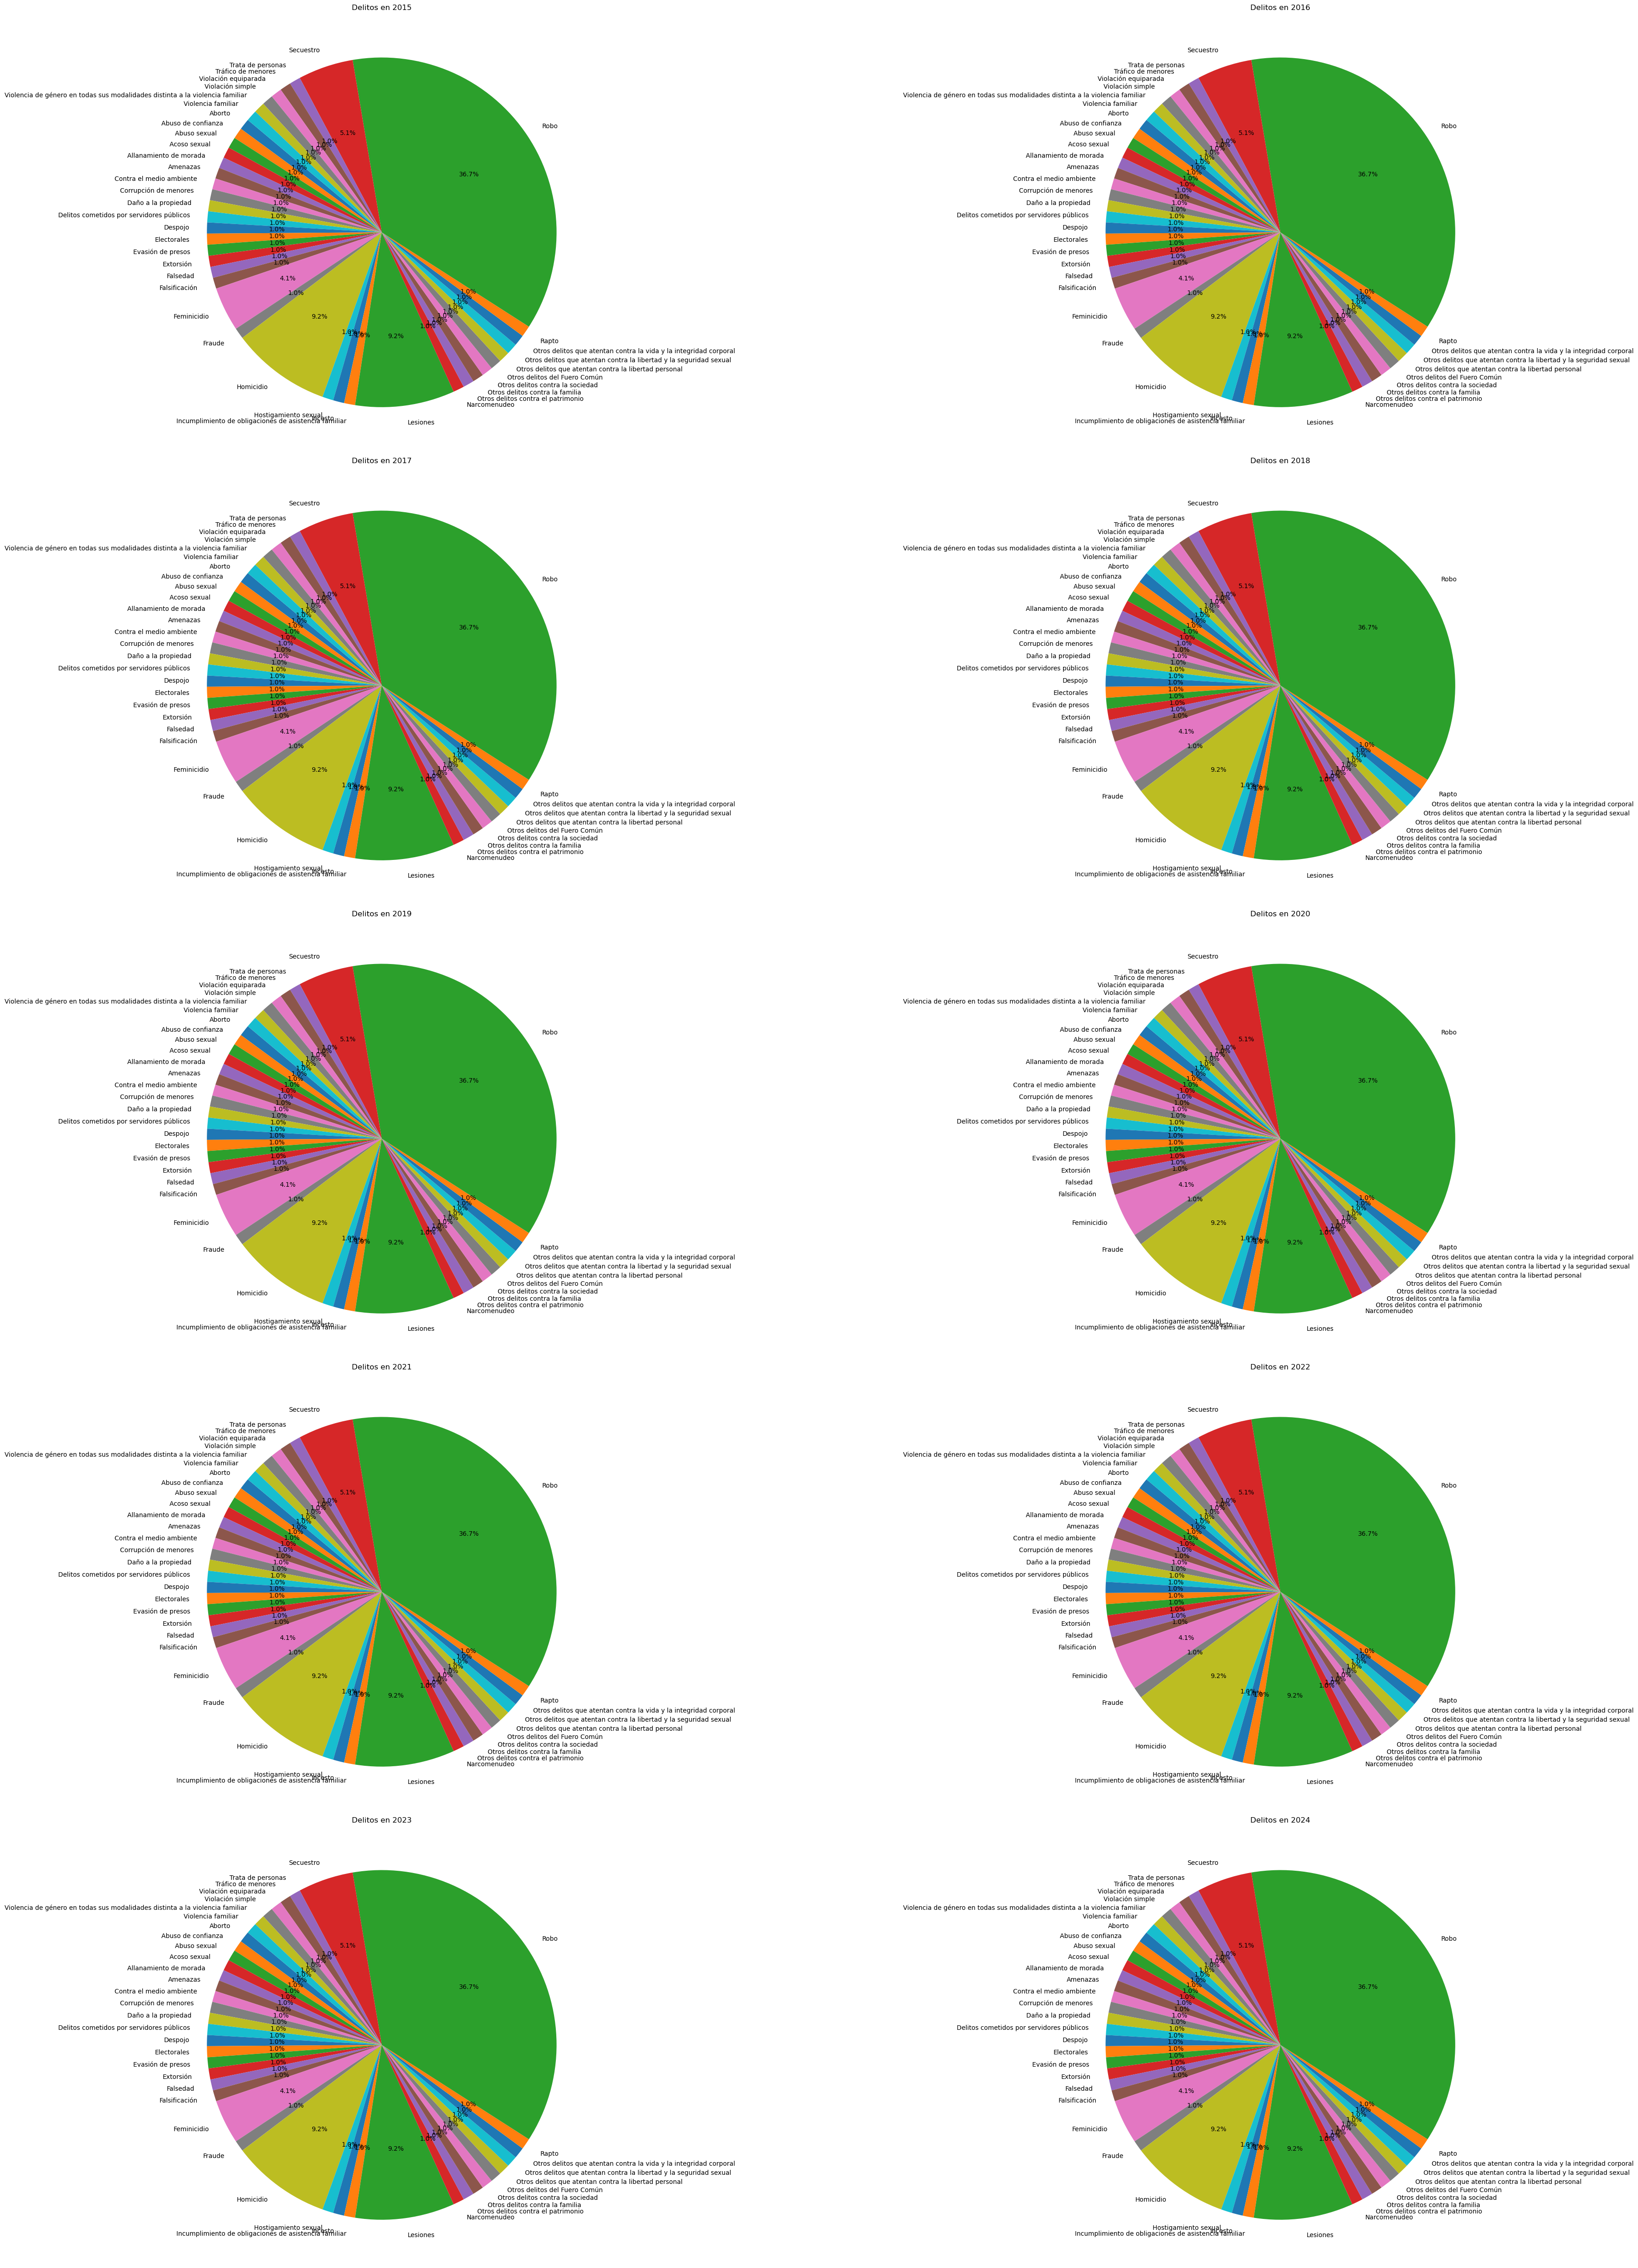

In [13]:
import math
grafico_delitos = delitos.groupby([delitos['fecha'].dt.year, 'tipo_de_delito']).size().unstack(fill_value = 0)
n_columnas = 2
n_filas = math.ceil(grafico_delitos.shape[0] / n_columnas)
fig, axes = plt.subplots(nrows = n_filas, ncols = n_columnas, figsize = (40, 10 * n_filas), sharey = True, constrained_layout = True)
axes = axes.flatten()
for i, (año, datos) in enumerate(grafico_delitos.iterrows()):
    axes[i].pie(datos, labels = datos.index, autopct = '%1.1f%%', startangle = 140)
    axes[i].set_title(f'Delitos en {año}')
for j in range(i + 1, n_filas * n_columnas):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

---
#### Calcula la tasa por 100,000 habitantes
##### Tasa por 100,000 habitantes
Mostrar el total de delitos en una entidad no nos sirve de mucho. Es mucho más útil calcular la tasa de incidencia delictiva por cada 100,000 habitantes

$$
tasa = \frac{delitos\space totales}{población} \times 100,000
$$

Esta tasa la podemos anualizar multiplicándola por un factor de 12
$$
tasa\space anualizada = tasa \times 12
$$

Población por entidad federativa según [la encuesta intercensal 2015](https://www.inegi.org.mx/programas/intercensal/2015/)

No tienes que descargar nada. Ya están los datos en la carpeta data

In [14]:
poblacion = pd.read_csv('data/poblacion_entidades_2015.csv', encoding = 'iso-8859-1', sep = ";")
poblacion = poblacion[['Cve_Entidad', 'Entidad', 'Poblacion']]
poblacion = poblacion.rename(columns = {'Cve_Entidad':'clave_ent', 'Entidad':'entidad', 'Poblacion':'poblacion_2015'})
poblacion.head()

,clave_ent,entidad,poblacion_2015
0,1,Aguascalientes,1312544.0
1,2,Baja California,3315766.0
2,3,Baja California Sur,712029.0
3,4,Campeche,899931.0
4,5,Coahuila de Zaragoza,5217908.0


In [15]:
delitos_poblacion                    = delitos.merge(poblacion, how = 'left', on = ['clave_ent', 'entidad'])
delitos_poblacion['tasa']            = (delitos_poblacion['frecuencia'] / delitos_poblacion['poblacion_2015']) * 100000
delitos_poblacion['tasa_anualizada'] = ((delitos_poblacion['frecuencia'] / delitos_poblacion['poblacion_2015']) * 100000) * 12
delitos_poblacion

,anio,clave_ent,entidad,bien_juridico_afectado,tipo_de_delito,subtipo_de_delito,nombre_mes,fecha,frecuencia,poblacion_2015,tasa,tasa_anualizada
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,enero,2015-01-01,3.0,1312544.0,0.228564,2.742765
1,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,enero,2015-01-01,1.0,1312544.0,0.076188,0.914255
2,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,enero,2015-01-01,0.0,1312544.0,0.000000,0.000000
3,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,enero,2015-01-01,2.0,1312544.0,0.152376,1.828510
4,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,enero,2015-01-01,0.0,1312544.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
376315,2024,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,diciembre,2024-12-01,NaN,1579209.0,NaN,NaN
376316,2024,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,diciembre,2024-12-01,NaN,1579209.0,NaN,NaN
376317,2024,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,diciembre,2024-12-01,NaN,1579209.0,NaN,NaN
376318,2024,32,Zacatecas,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,diciembre,2024-12-01,NaN,1579209.0,NaN,NaN
